<a href="https://colab.research.google.com/github/steeveabdul/Abdul--Rahman/blob/main/source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-e810f2ef67b1>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


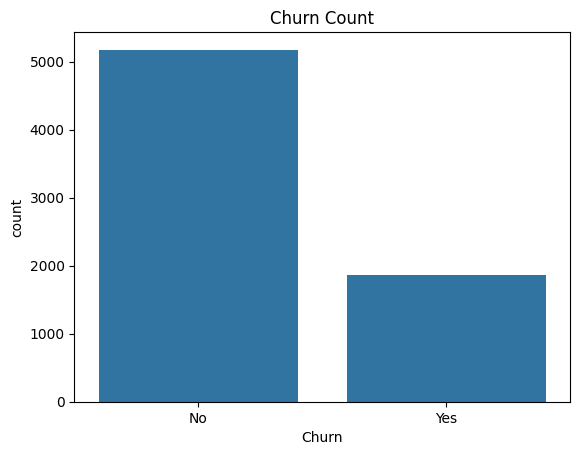

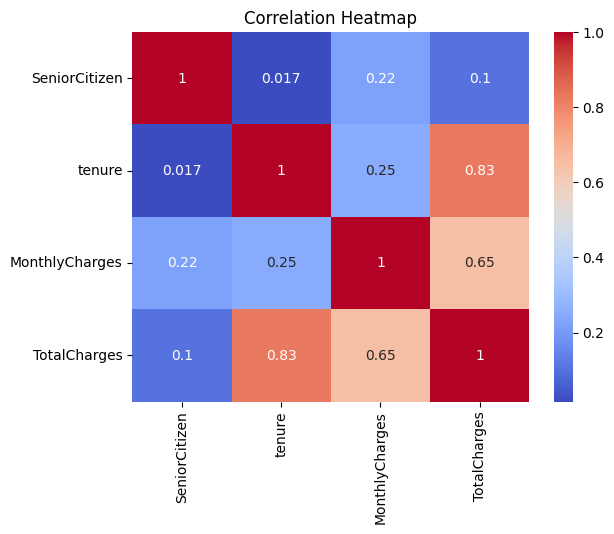

Accuracy Score: 0.815471965933286
Confusion Matrix:
 [[933 103]
 [157 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



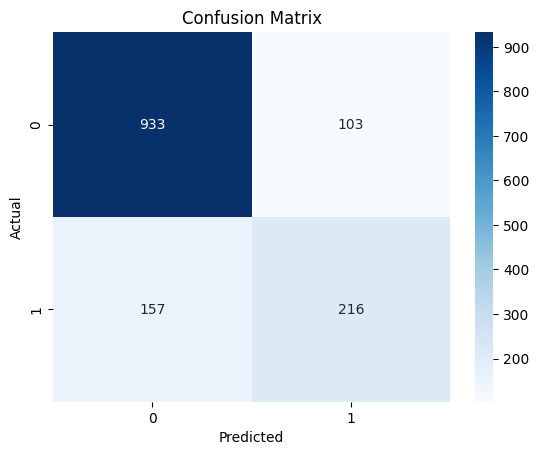

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


# Data Preprocessing


# Drop customerID as it is not useful for prediction
df.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric (some are spaces)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Fill missing values with median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


# Exploratory Data Analysis (EDA)


# Display churn distribution
sns.countplot(data=df, x="Churn")
plt.title("Churn Count")
plt.show()

# Check correlations
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Feature Engineering


# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Model Development


# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


# Evaluation


# Print evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Visualization


# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
